# Customer Churn Dataset

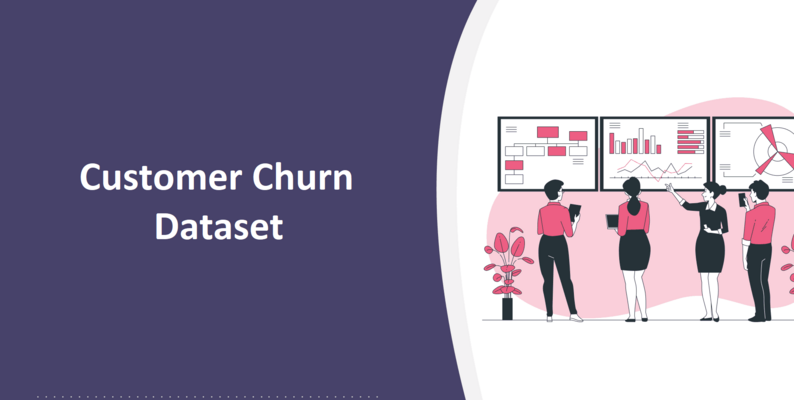

##Source:
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset
###Objective:
Investigate customer attrition patterns based on service usage.

### Overview  
This dataset contains customer information related to a company's subscription-based services. It helps in analyzing factors that contribute to customer churn (i.e., customers leaving the service). The dataset can be used for predictive modeling, customer segmentation, and retention strategies.

### Features  
The dataset includes various attributes such as:  
- **Customer ID**: Unique identifier for each customer.  
- **Gender**: Male or Female.  
- **SeniorCitizen**: Whether the customer is a senior citizen (0 = No, 1 = Yes).  
- **Partner**: Whether the customer has a partner (Yes/No).  
- **Dependents**: Whether the customer has dependents (Yes/No).  
- **Tenure**: Number of months the customer has stayed with the company.  
- **PhoneService**: Whether the customer has phone service (Yes/No).  
- **MultipleLines**: If they have multiple phone lines (Yes/No/No phone service).  
- **InternetService**: Type of internet service (DSL, Fiber Optic, None).  
- **OnlineSecurity, OnlineBackup, TechSupport, StreamingTV, StreamingMovies**: Whether the customer has opted for these services (Yes/No/No internet service).  
- **Contract**: Type of contract (Month-to-month, One year, Two years).  
- **PaperlessBilling**: Whether the customer has opted for paperless billing (Yes/No).  
- **PaymentMethod**: Payment method used (Electronic check, Mailed check, etc.).  
- **MonthlyCharges**: Monthly amount charged to the customer.  
- **TotalCharges**: Total amount charged.  
- **Churn**: Whether the customer has churned (Yes/No).  



In [87]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
import warnings
warnings.filterwarnings('ignore')

In [88]:
#Reading the data
data = pd.read_csv("/content/customer_churn_dataset-testing-master.csv")

In [89]:
#Printing the data
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [90]:
#finding the datatypes,colums and rows /information of the data provided
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


From the info we can see
1. The data has 64374 rows and 12 columns
2. There are no null values and few categorial colomns are present




In [91]:
#Print the duplicated rows
data[data.duplicated()]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [92]:
#finding the mean,Standard deviation ,count, median for columns
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


1. From describing data we can see most few coloumns have high diff between 75%(upper quartile region) and max (outer extreme) so there might be outliers present
2. So plotting histogram and boxplot for numerical colomns


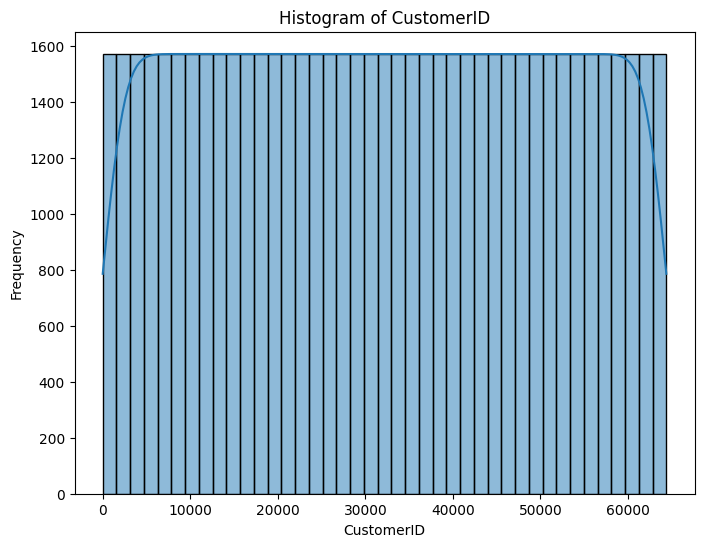

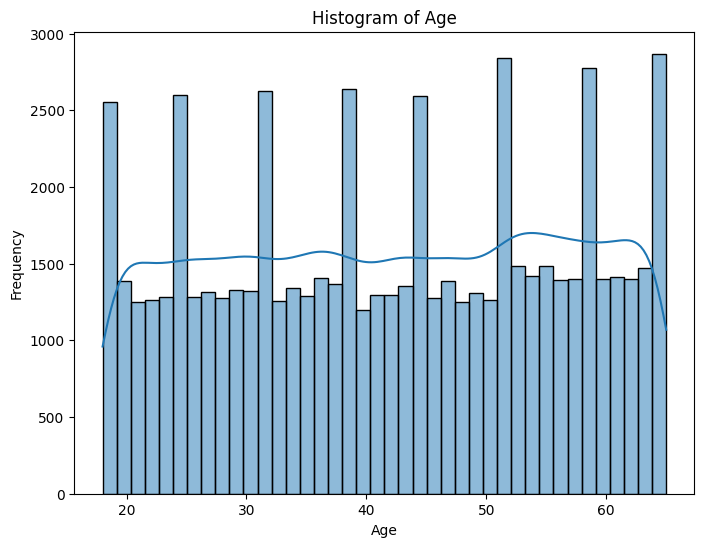

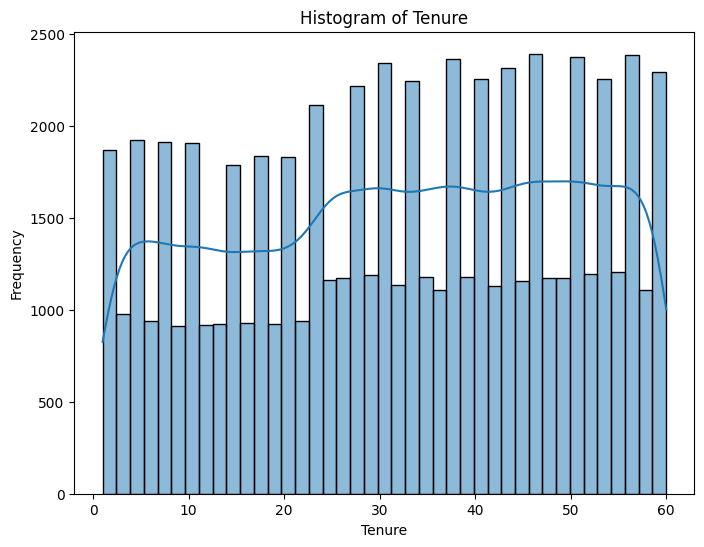

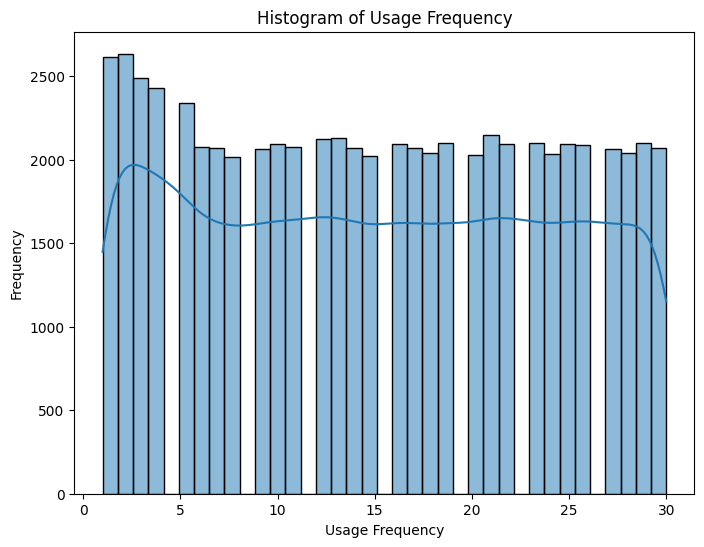

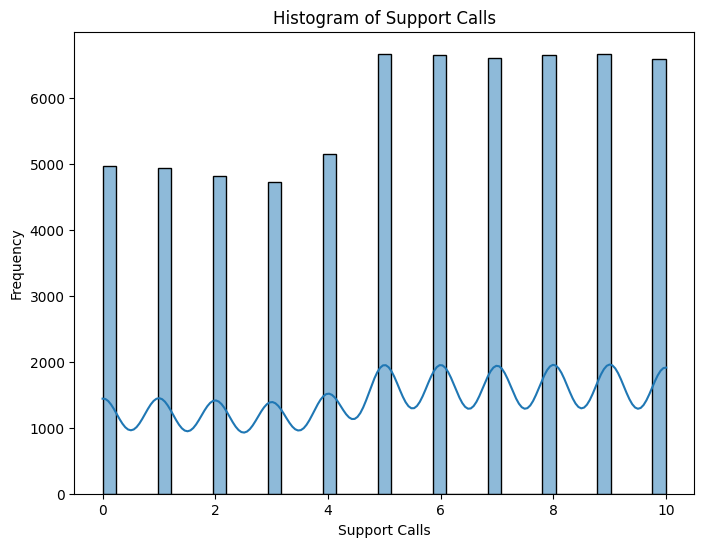

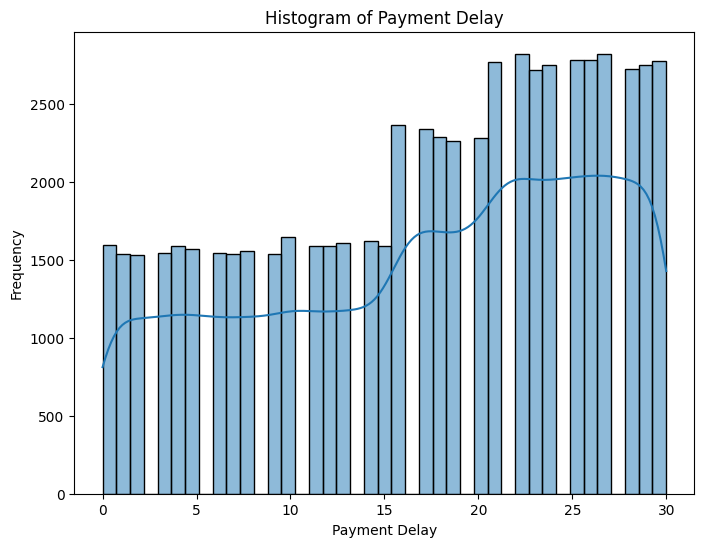

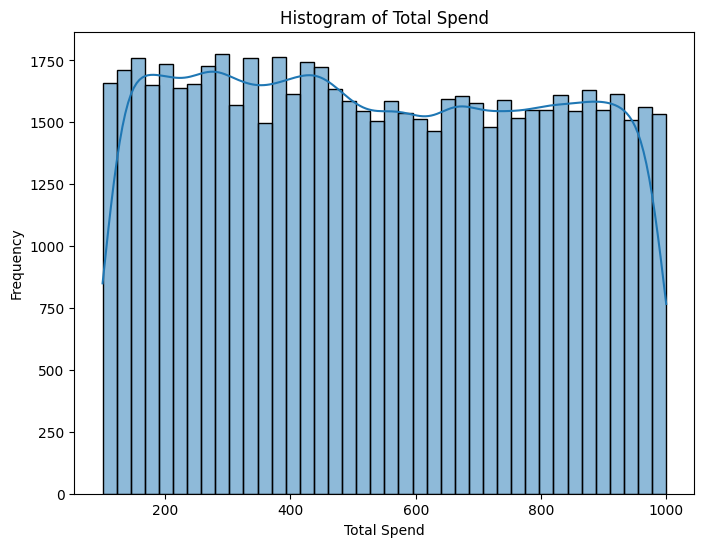

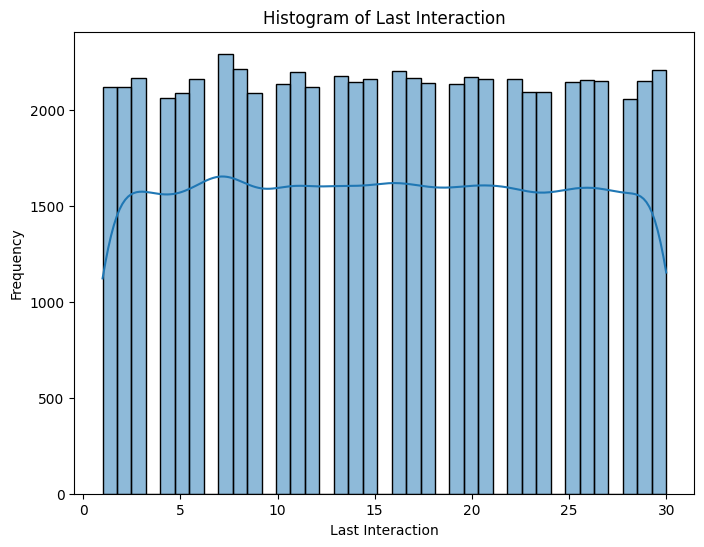

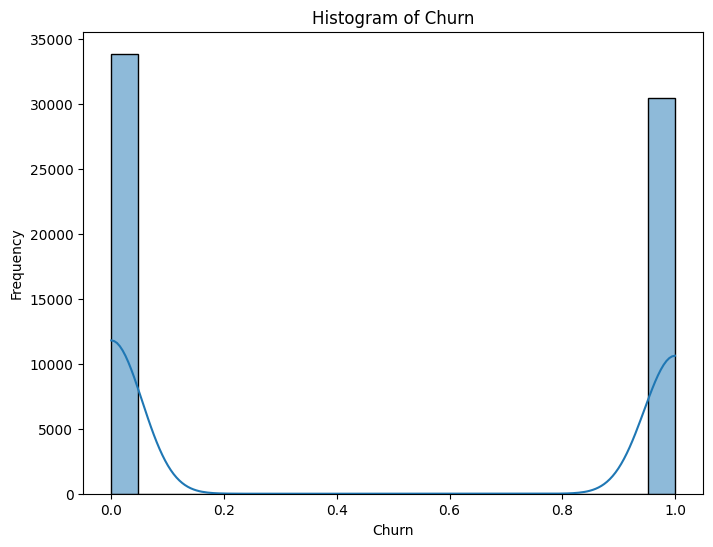

In [93]:
#Histogram for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)  # Added KDE for better visualization
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From the histogram we can observe
1. Age: The distribution has a peak around 30-40 years, with a right-skewed shape, indicating a larger number of younger customers.
2. Tenure: Most customers have a tenure between 10-30 months, with a few outliers staying longer.
3. Usage Frequency: Peaks around 10 and 25, showing two main user groups—light and heavy users.
4. Support Calls: Right-skewed with most customers making fewer than 5 support calls.
5. Payment Delay: Peak around 10 days, with some customers experiencing long delays.
6. Total Spend: Peaks at lower values, indicating most customers spend less.
Last Interaction: Left-skewed, suggesting many recent interactions.

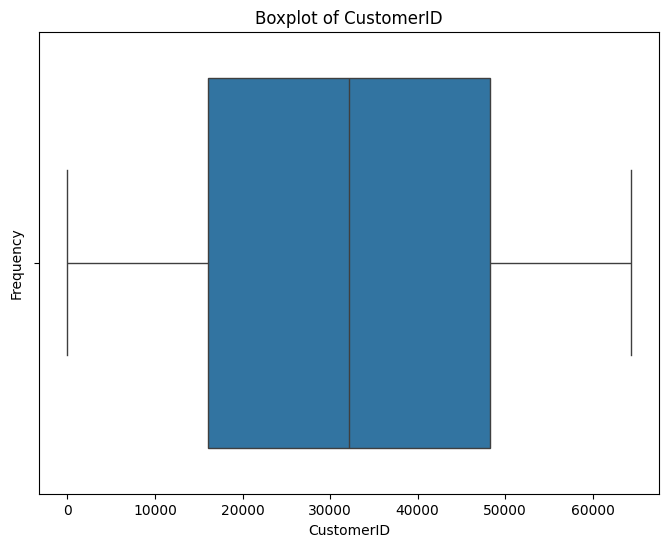

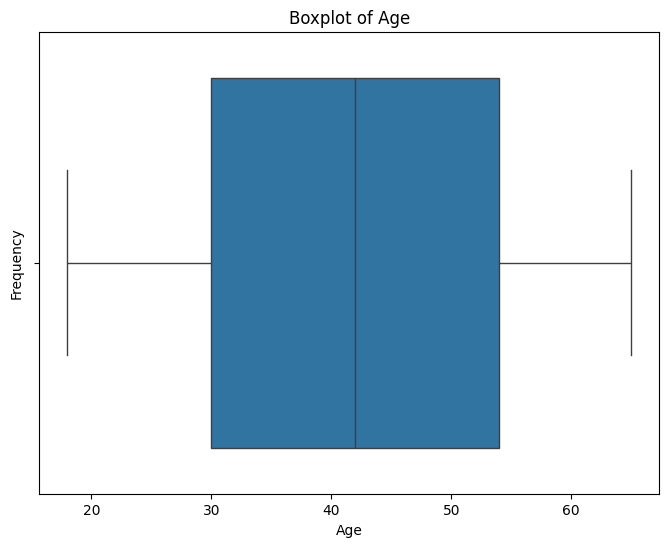

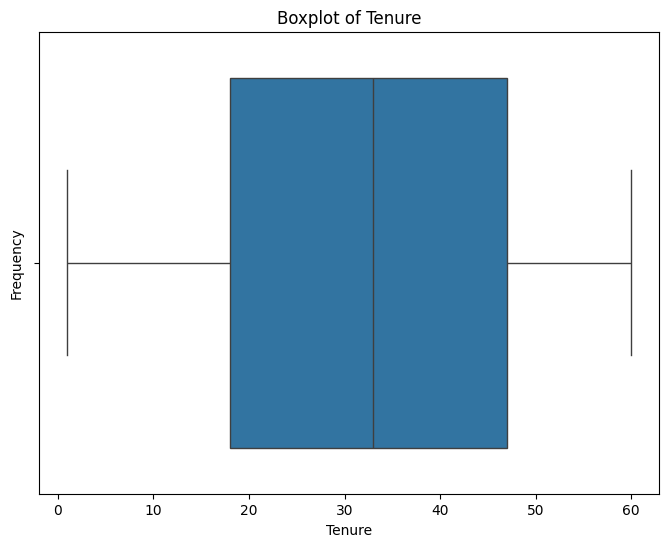

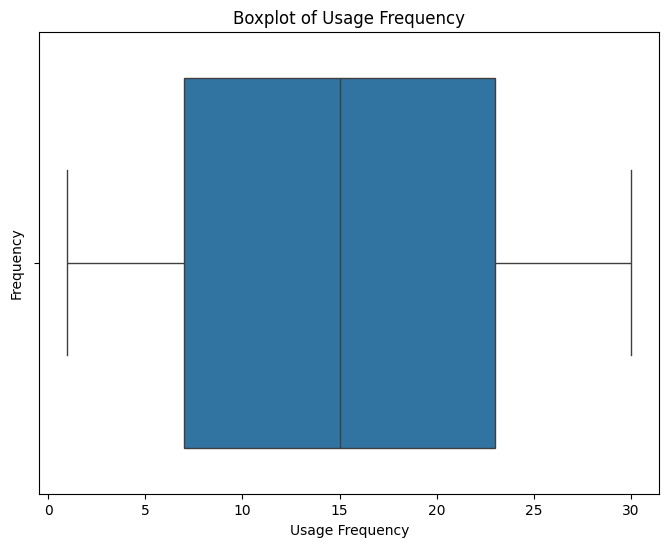

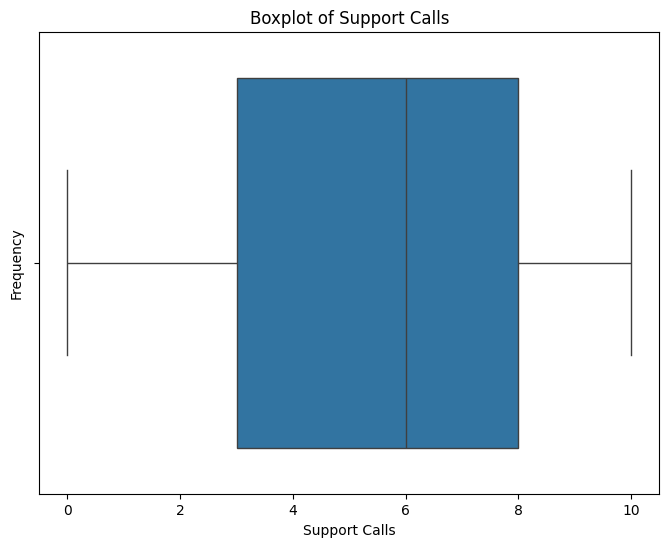

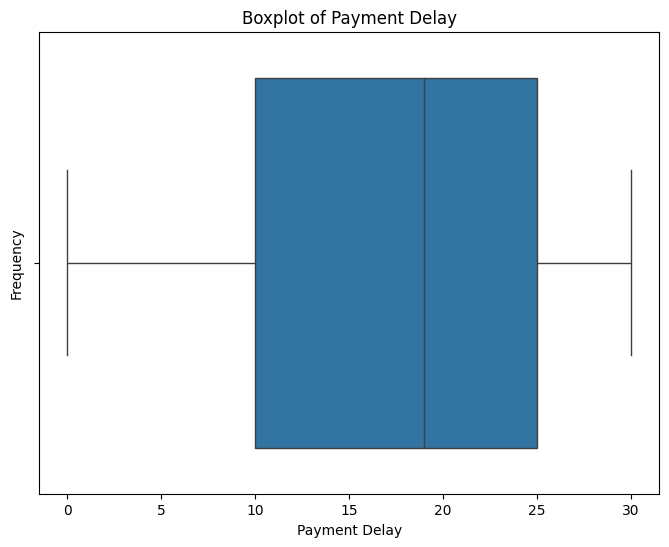

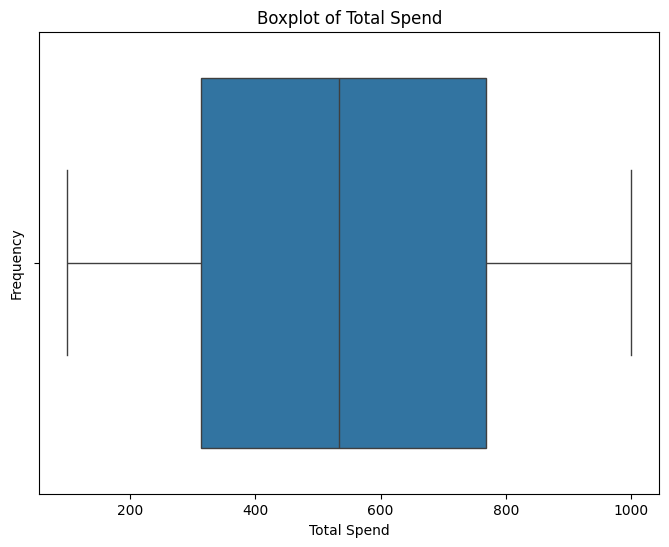

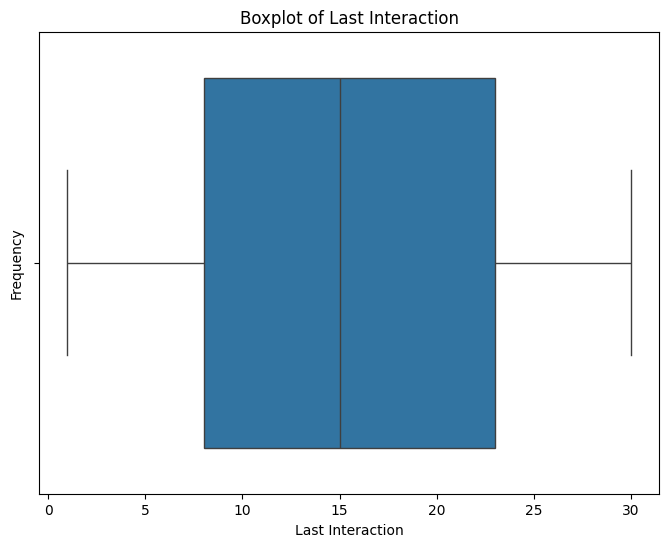

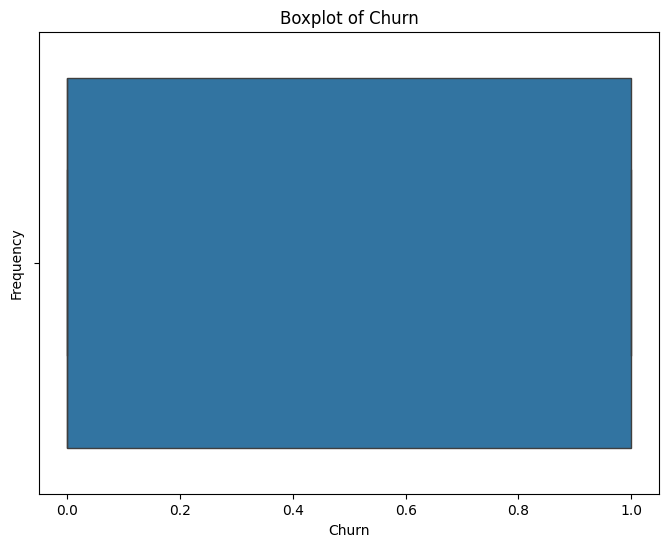

In [94]:
#boxplot for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From the boxplot
1. We can observe there are no outliers for the dataset but since histogram is showing skewness for few coloumns let check using IQR



In [95]:
# Calculate IQR and detect outliers
outliers = {}
for col in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col].count()

outliers


{'CustomerID': 0,
 'Age': 0,
 'Tenure': 0,
 'Usage Frequency': 0,
 'Support Calls': 0,
 'Payment Delay': 0,
 'Total Spend': 0,
 'Last Interaction': 0,
 'Churn': 0}

Since there are no outliers present we can proced further analysis

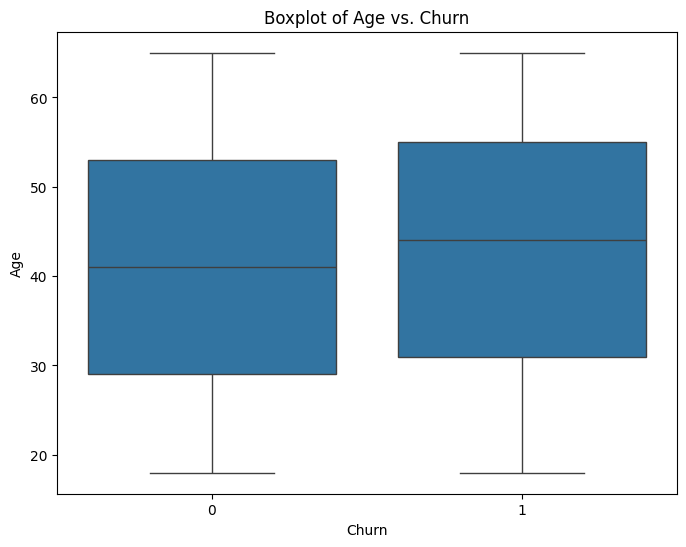

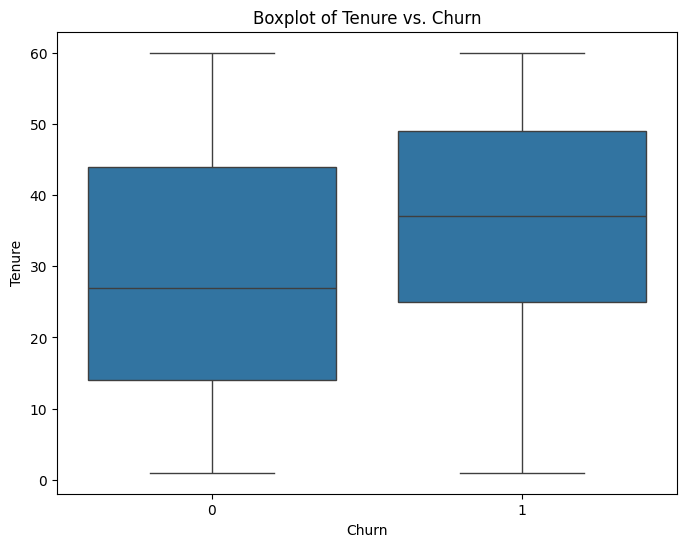

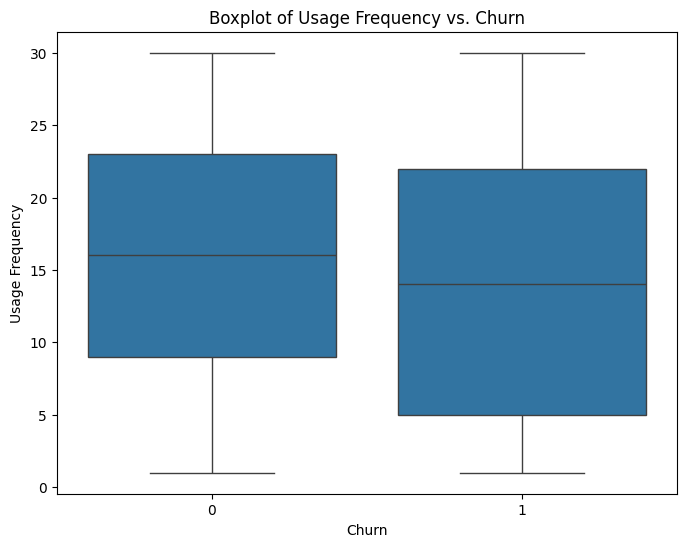

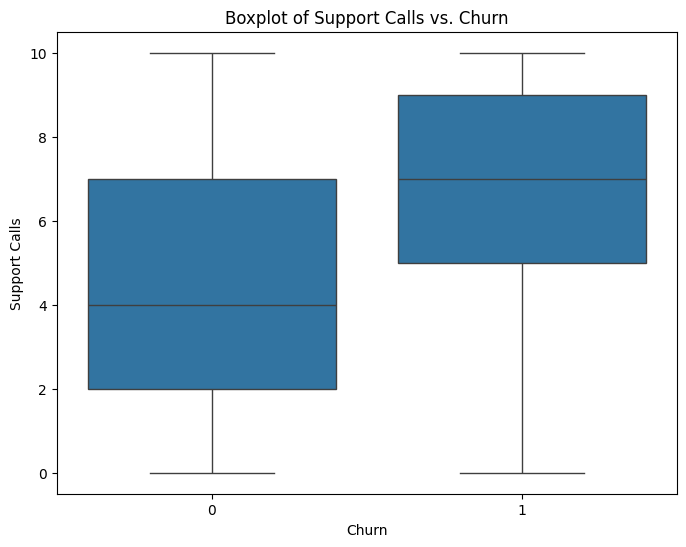

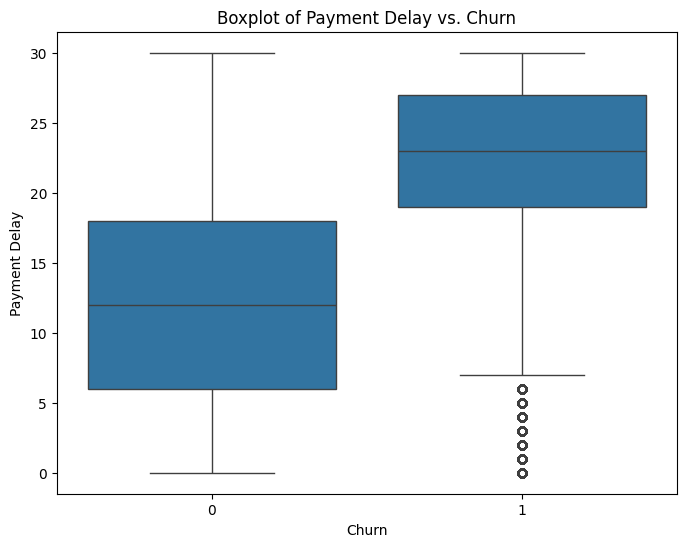

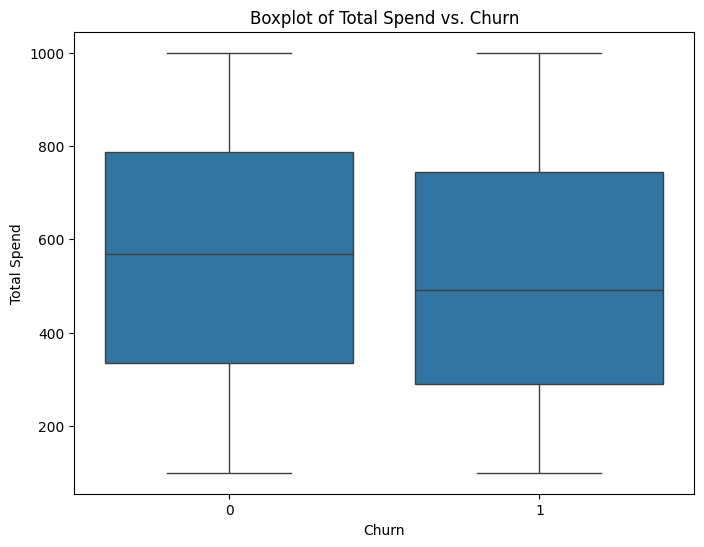

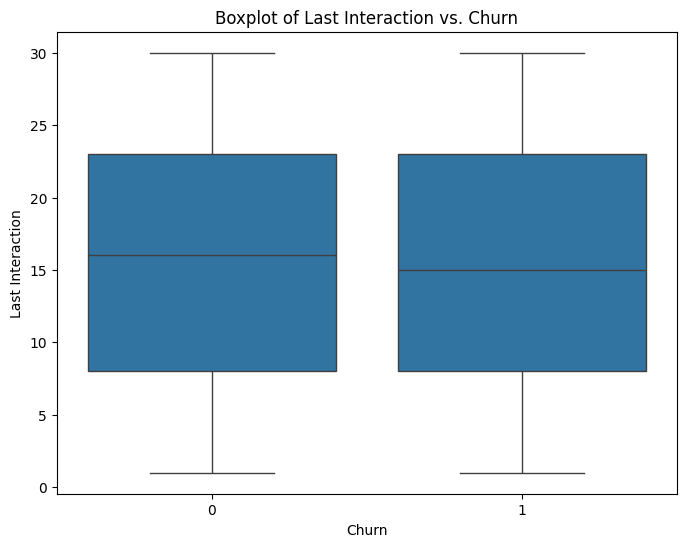

In [96]:
# Boxplot for churn vs numerical columns (excluding 'Churn' and 'CustomerID')
for col in data.select_dtypes(include=np.number).columns:
    if col not in ['Churn', 'CustomerID']:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Churn', y=col, data=data)
        plt.title(f'Boxplot of {col} vs. Churn')
        plt.xlabel('Churn')
        plt.ylabel(col)
        plt.show()

From the boxplot
1. The age distribution for both churned (1) and non-churned (0) customers is very similar, indicating that age does not significantly impact churn.
Both groups have a similar age range (approx. 18 to 65), suggesting no major variation in churn behavior across age groups.
2. Churned customers have lower tenure, with a median around 35, while non-churned customers have a median around 25.
Wider range for non-churned customers, indicating they stay longer on average.
And coustmers with longer tenure are most likely to leave
3. Churned customers have slightly lower median usage frequency than non-churned customers.Similar overall distribution, but churned customers show more variation in usage.Coustmers with high usage frequency are more like to stay
4. Churned customers make more support calls, with a median around 7, compared to 4 for non-churned customers.Higher number of support calls increases churn likelihood, suggesting dissatisfaction or service issues.Customers with fewer support calls are more likely to stay.
5. Churned customers have longer payment delays, with a median around 23, compared to 12 for non-churned customers.Higher payment delays increase the chance of customers leaving, indicating possible financial difficulties or dissatisfaction.Outliers in churned customers suggest some extreme cases of delayed payments.
6. Total spend is similar for both churned and non-churned customers, with a median around 600 for non-churned and 500 for churned.
Spending does not show a strong correlation with churn, suggesting that other factors may drive customer retention or departure.
Outliers exist in both groups, indicating some customers spend significantly more or less than the typical range.
7. Last interaction distribution is nearly identical for churned and non-churned customers, with a median around 15 days.
No clear pattern suggests that recent interactions significantly impact churn, implying other factors may be stronger predictors.
Wide spread in data indicates variation in customer engagement patterns, regardless of churn status.


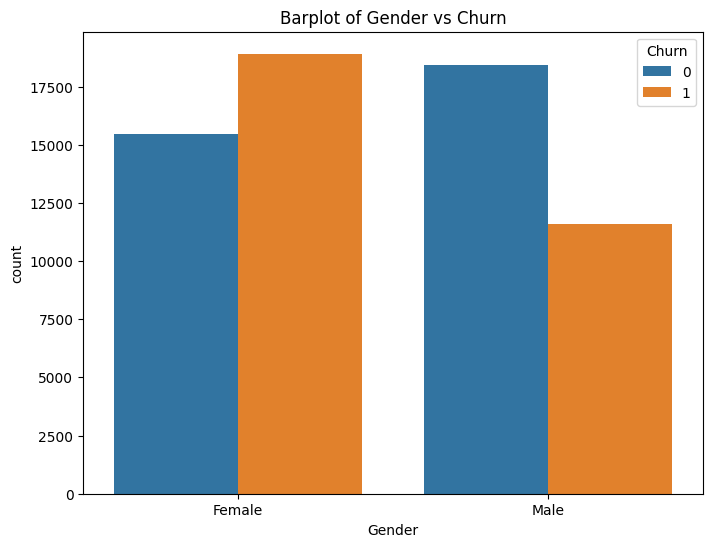

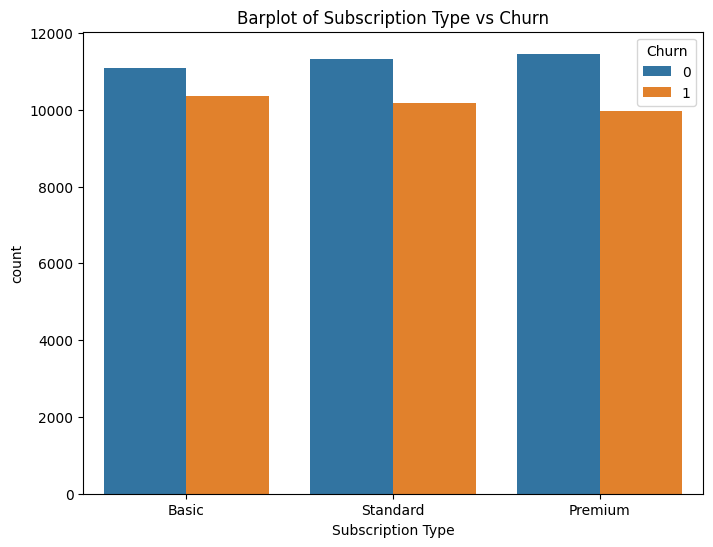

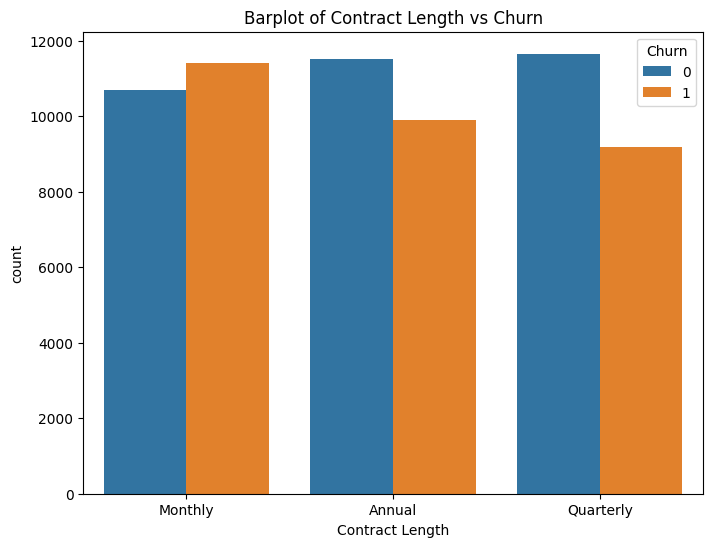

In [97]:
#Barplot for relation between categorial colomns and price
for col in data.select_dtypes(include=['object']):
  if col not in ['Churn', 'CustomerID']:
    plt.figure(figsize=(8,6))
    sns.countplot(x = col, hue = 'Churn', data = data)
    plt.title(f'Barplot of {col} vs Churn')
    plt.show()

From countplot
1. Gender & Churn:
 * More females have churned compared to males.
 * The churn rate among males is lower than females.
2. Subscription Type & Churn:
  * Basic and Standard plans have a higher proportion of churned customers.
  * Premium users churn less, likely due to higher engagement or satisfaction.
3. Contract Length & Churn:
  * Monthly contracts have the highest churn rate.
  * Annual contracts have the lowest churn, suggesting longer-term commitments reduce churn.

In [98]:
#Printing the last five rows in the dataset
data.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


In [99]:
#Finding the unique values in categorial colomns
for col in data.select_dtypes(include=['object']):
  if col not in ['Churn', 'CustomerID']:
    print(f"Unique values in column '{col}':")
    print(data[col].unique())
    print("-" * 20)


Unique values in column 'Gender':
['Female' 'Male']
--------------------
Unique values in column 'Subscription Type':
['Basic' 'Standard' 'Premium']
--------------------
Unique values in column 'Contract Length':
['Monthly' 'Annual' 'Quarterly']
--------------------


In [100]:
# Encoding Categorical Variables (0 and 1) using One-Hot Encoding
categorical_columns = [ 'Gender', 'Subscription Type','Contract Length']

data = pd.get_dummies(data, columns=categorical_columns, drop_first=False)  # Keep all categories

# Convert True/False values to 0 and 1 explicitly
data = data.astype(int)

# Display cleaned dataset
print(data.head())


   CustomerID  Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0           1   22      25               14              4             27   
1           2   41      28               28              7             13   
2           3   47      27               10              2             29   
3           4   35       9               12              5             17   
4           5   53      58               24              9              2   

   Total Spend  Last Interaction  Churn  Gender_Female  Gender_Male  \
0          598                 9      1              1            0   
1          584                20      0              1            0   
2          757                21      0              0            1   
3          232                18      0              0            1   
4          533                18      0              1            0   

   Subscription Type_Basic  Subscription Type_Premium  \
0                        1                          0

# One-Hot Encoding

One-hot encoding is a technique used in machine learning to convert categorical data into a numerical format. It represents each category as a binary vector, where only one bit is "hot" (i.e., set to 1) and all others are 0.

### Example:
If we have a "Color" feature with values **Red, Green, Blue**, one-hot encoding would transform it as:

| Color  | Red | Green | Blue |
|--------|-----|-------|------|
| Red    | 1   | 0     | 0    |
| Green  | 0   | 1     | 0    |
| Blue   | 0   | 0     | 1    |

This prevents the model from misinterpreting categorical values as ordinal (numerically meaningful), ensuring better performance in algorithms like logistic regression or neural networks. However, it can increase dimensionality, especially with high-cardinality features.


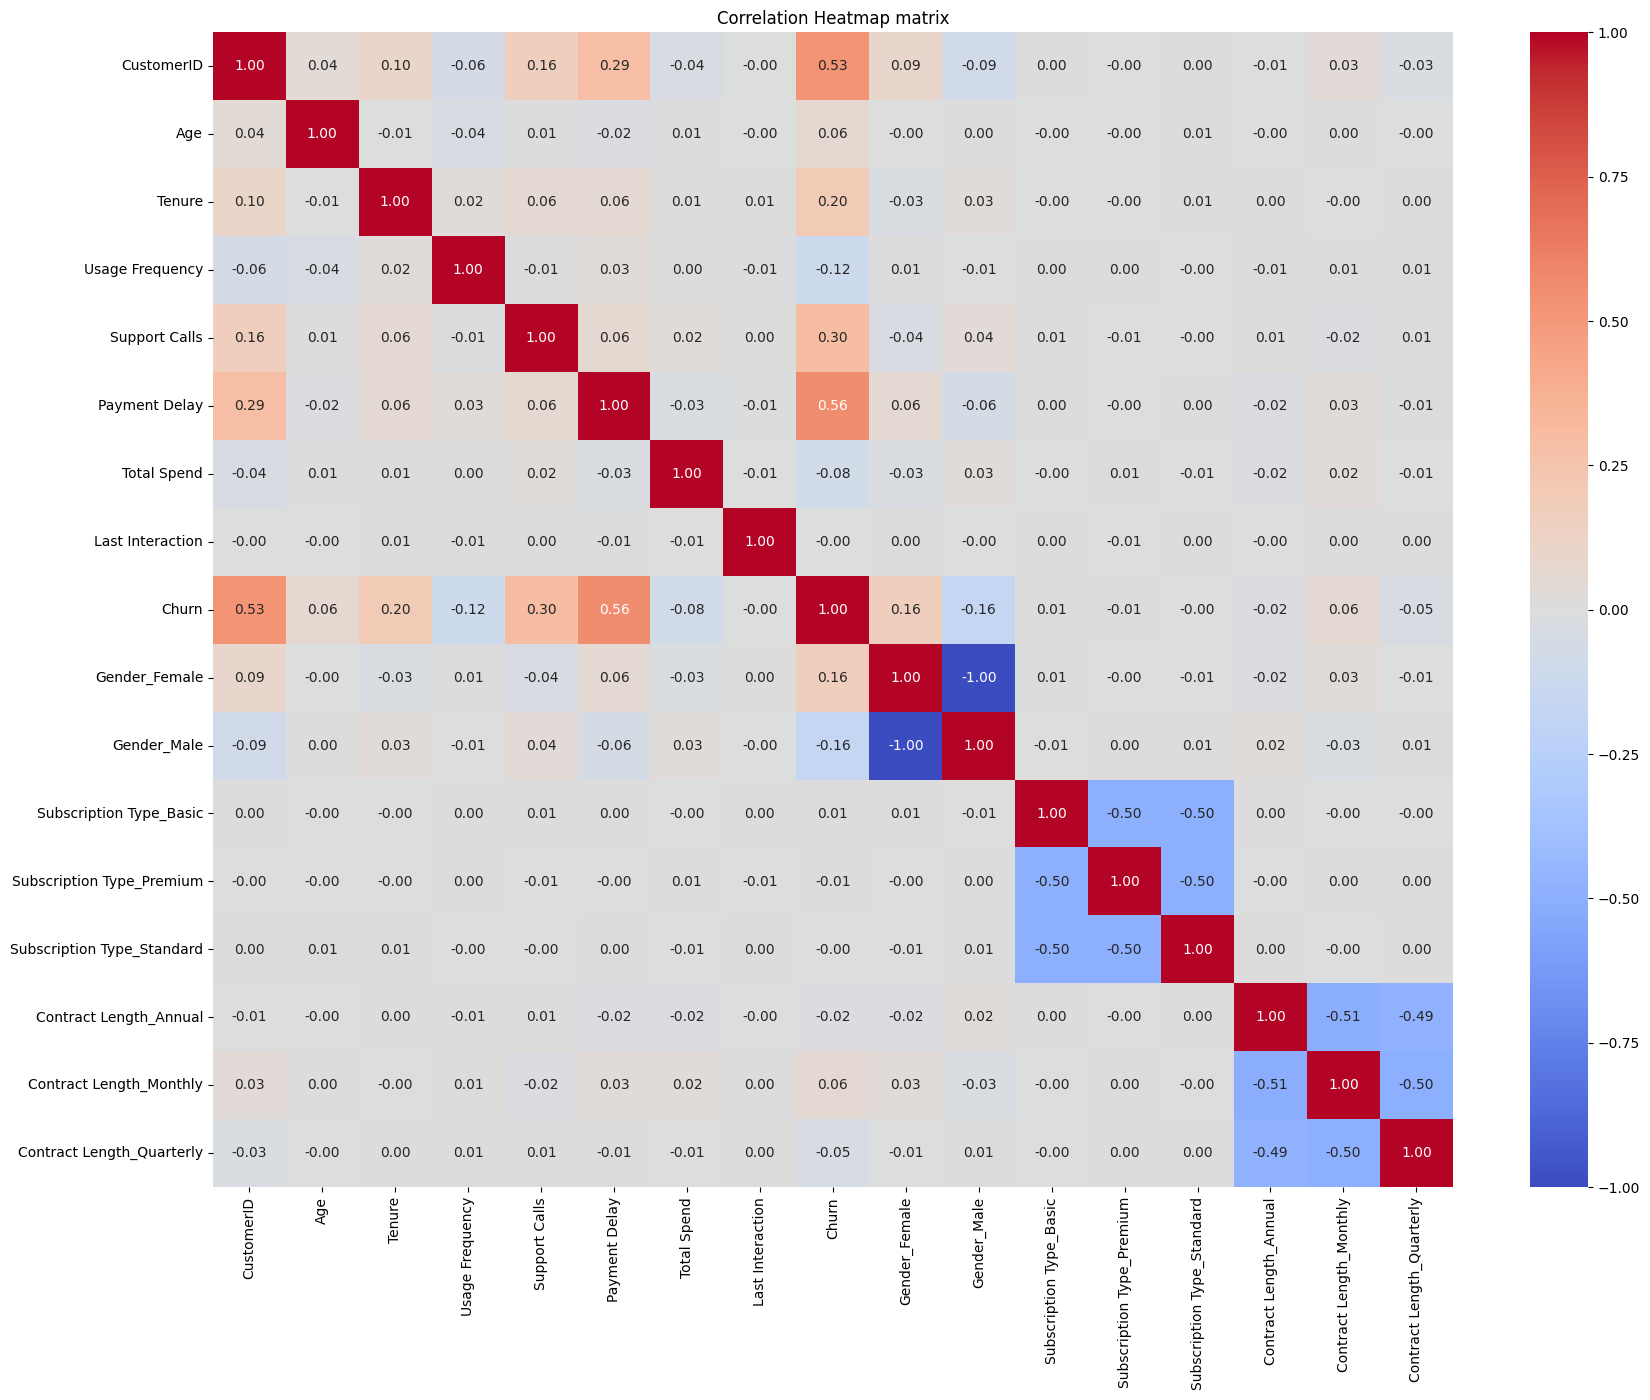

In [101]:
# Correlation Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap matrix')
plt.show()


From the heatmap
1. Churn is highly correlated with Payment Delay (0.56) and CustomerID (0.53), indicating that customers with longer payment delays are more likely to churn, possibly due to financial difficulties or dissatisfaction.
2. Support Calls have a moderate positive correlation with Churn (0.30), suggesting that customers who frequently contact support may be facing issues that lead to cancellation.
3. Contract Length (Monthly) has a slight positive correlation with Churn (0.06), while Contract Length (Annual) has a weak negative correlation (-0.02), implying that long-term contracts might help in customer staying  .
4. Subscription Type (Basic, Standard, Premium) are mutually exclusive and negatively correlated with each other, meaning a customer can belong to only one category. No strong correlation is observed between any Subscription Type and Churn or leave.
5. Usage Frequency has a weak negative correlation with Churn (-0.12), suggesting that more engaged customers are slightly less likely to leave.
6. Gender (Female: 0.16, Male: -0.16) has a weak correlation with Churn, indicating that gender does not have a significant impact on customer retention.

In [102]:
# printing the data values in an array
data.values


array([[    1,    22,    25, ...,     0,     1,     0],
       [    2,    41,    28, ...,     0,     1,     0],
       [    3,    47,    27, ...,     1,     0,     0],
       ...,
       [64372,    25,    39, ...,     0,     1,     0],
       [64373,    50,    18, ...,     0,     1,     0],
       [64374,    52,    45, ...,     0,     1,     0]])

In [103]:
#Scaling the data
array = data.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.00e+00 8.51e-02 4.07e-01 4.48e-01 4.00e-01 9.00e-01 5.53e-01 2.76e-01
  1.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00
  0.00e+00]
 [1.55e-05 4.89e-01 4.58e-01 9.31e-01 7.00e-01 4.33e-01 5.38e-01 6.55e-01
  0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00
  0.00e+00]
 [3.11e-05 6.17e-01 4.41e-01 3.10e-01 2.00e-01 9.67e-01 7.30e-01 6.90e-01
  0.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00
  0.00e+00]
 [4.66e-05 3.62e-01 1.36e-01 3.79e-01 5.00e-01 5.67e-01 1.47e-01 5.86e-01
  0.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00
  1.00e+00]
 [6.21e-05 7.45e-01 9.66e-01 7.93e-01 9.00e-01 6.67e-02 4.81e-01 5.86e-01
  0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 1.00e+00 0.00e+00
  0.00e+00]]


In [104]:
# Standardize data (0 mean, 1 stdev)
array = data.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-1.73 -1.43 -0.41 -0.12 -0.45  1.11  0.22 -0.75  1.05  0.93 -0.93  1.41
  -0.71 -0.71 -0.71  1.38 -0.69]
 [-1.73 -0.07 -0.23  1.47  0.51 -0.47  0.16  0.52 -0.95  0.93 -0.93 -0.71
  -0.71  1.41 -0.71  1.38 -0.69]
 [-1.73  0.36 -0.29 -0.58 -1.09  1.34  0.83  0.64 -0.95 -1.07  1.07 -0.71
   1.42 -0.71  1.42 -0.72 -0.69]
 [-1.73 -0.5  -1.34 -0.35 -0.13 -0.02 -1.18  0.29 -0.95 -1.07  1.07 -0.71
   1.42 -0.71 -0.71 -0.72  1.45]
 [-1.73  0.79  1.52  1.01  1.16 -1.71 -0.03  0.29 -0.95  0.93 -0.93 -0.71
  -0.71  1.41  1.42 -0.72 -0.69]]


So to conclude
1. Customers with longer payment delays and frequent support calls are more likely to leave 📉.
2. Short-term contracts (monthly)  have a slightly higher chance of customers leaving, while long-term contracts (annual) help customers stay 🚀.
3. Higher usage frequency is linked to customers staying, indicating that engaged customers are less likely to leave.
4. 👥 Gender has a minimal impact on whether customers stay or leave, but female customers show a slightly higher correlation which means females are more likely to leave than male coustmers.
5. Subscription type 🗃️ doesn’t strongly determine whether customers stay or leave, implying that other factors influence customer decisions.